In [5]:
#importing required standard libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
#reading data set from the provided CSV file
df = pd.read_csv('bank-full.csv')

In [6]:
#dropping duplicates if any are present
df = df.drop_duplicates()
#getting information on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [7]:
#converting object data types to category data type
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [8]:
#checking if conversion happened correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 3.2 MB


No null values are there in any of the column.

In [9]:
#checking the distribution of data across the class at job level
pd.crosstab(df.job, df.Target)

Target,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [10]:
#checking percentage distribution of each type of job level in the total dataset provided
df.job.value_counts()/df.job.count()

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

Blue Collar jobs represent the highest class from which data was collected. There is a negligible amount of data that has no joblevel captured (unknown)

In [11]:
df.marital.value_counts()/df.marital.count()

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

60% people from which the data is collected are married. Single and Divorced can be combined to one value as Single

In [12]:
df.default.value_counts()/df.default.count()

no     0.981973
yes    0.018027
Name: default, dtype: float64

Over 98% data from the default column says the users have not defaulted their loan which is a pretty good sign from domain perspective. very less amount is defaulters.

In [13]:
df.housing.value_counts()/df.housing.count()

yes    0.555838
no     0.444162
Name: housing, dtype: float64

Over 50% of the people have house/property and 45 % do not possess one.

In [14]:
df.Target.value_counts()/df.Target.count()

no     0.883015
yes    0.116985
Name: Target, dtype: float64

88% have not taken the product which suggests the model would do pretty good in identifying the NO cases but model will perform 
badly in identifying people who will fall in the Yes category. Clearly, it is an imbalanced dataset.

In [15]:
df.poutcome.value_counts()/df.poutcome.count()

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

In [16]:
df.contact.value_counts()/df.contact.count()

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

64% people were connected over the cell phone.

In [17]:
df.month.value_counts()/df.month.count()

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

30% of the people were connected in the month of may and very less in the month of december. This is important to assume maybe they were connected in the fiscal year's first quarter.

In [18]:
df.loan.value_counts()/df.loan.count()

no     0.839774
yes    0.160226
Name: loan, dtype: float64

84% of the people seems to have no loan 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002200E0C4BA8>,
      dtype=object)

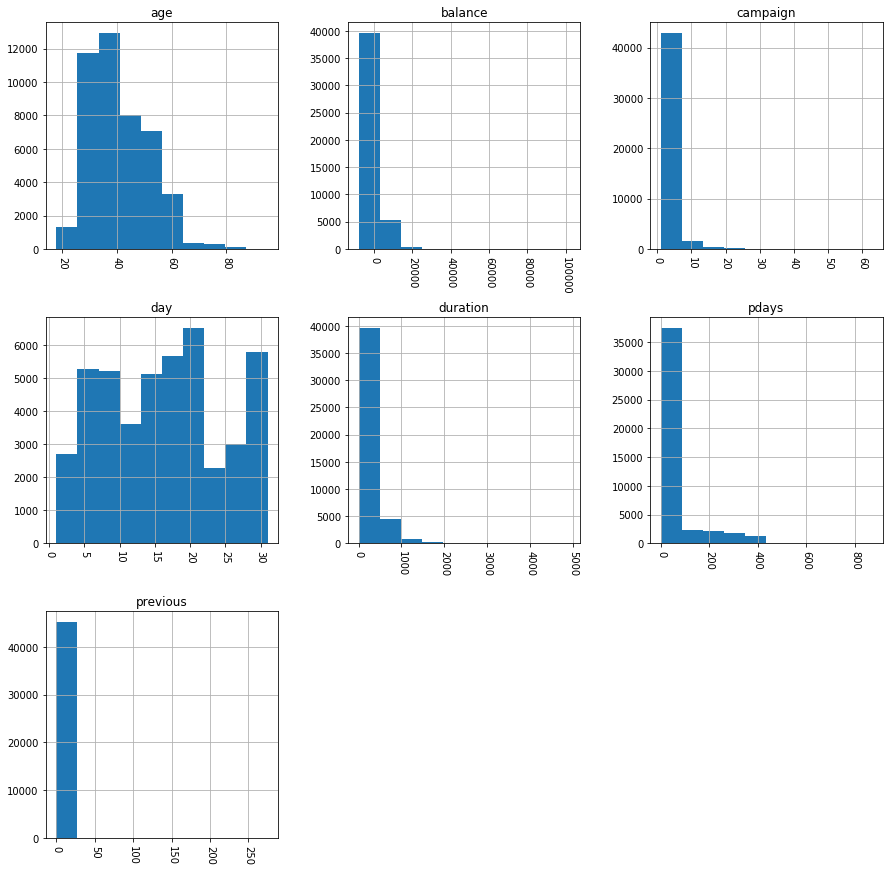

In [19]:
df.hist(figsize=(15,15), xrot=-90)

hist plots show that they are not having an idealistic normal distribution

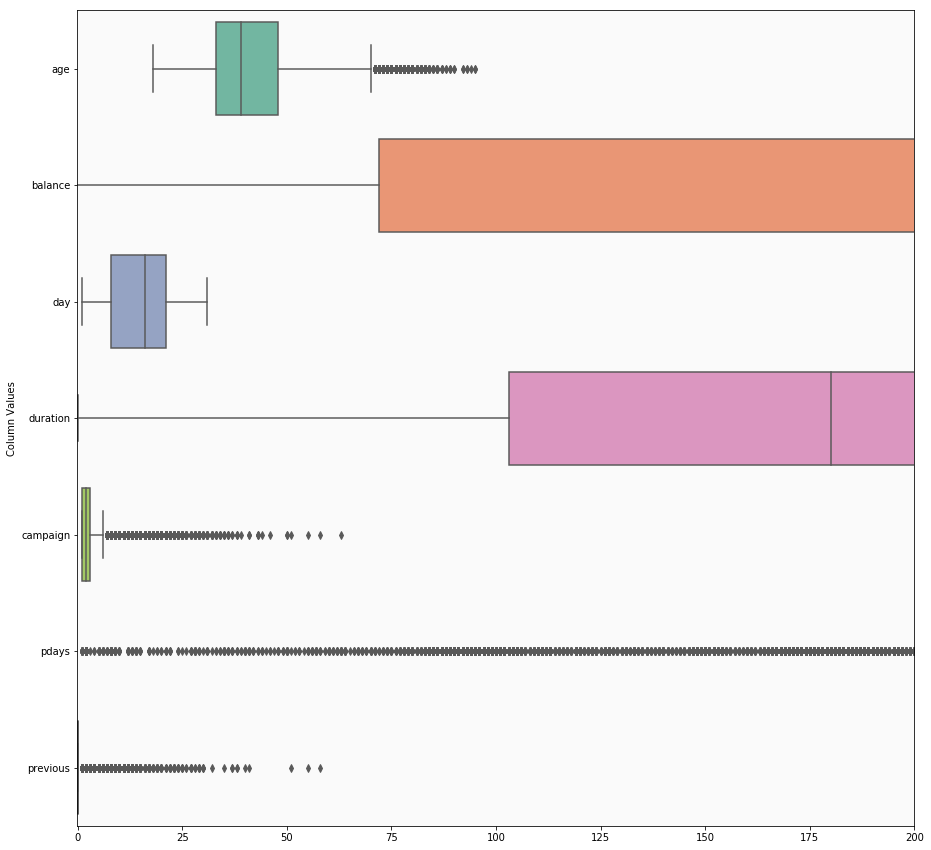

In [20]:
f, ax = plt.subplots(figsize=(15, 15))
ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Column Values')
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

Box plot shows the range of values for each of the column and it shows the values are on different scales. There are a lot of outliers in the columns that is evident from the box plot. 

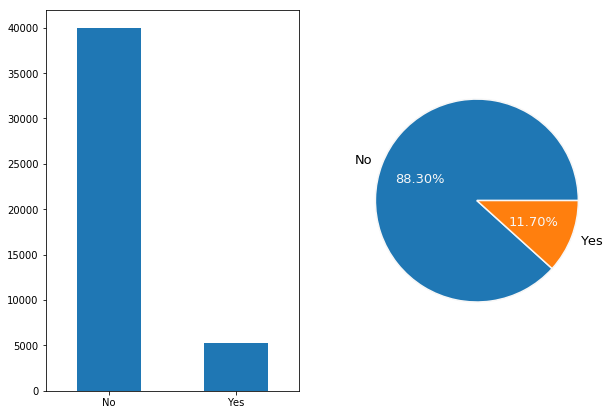

In [21]:
#checking out the percentage of class values in the data set 
f, ax = plt.subplots(1, 2, figsize = (10, 7))
_ = df.Target.value_counts().plot.bar(ax = ax[0], rot = 0).set(xticklabels = ["No", "Yes"])
_ = df.Target.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

In [22]:
#get the exact value count for both classes
df.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

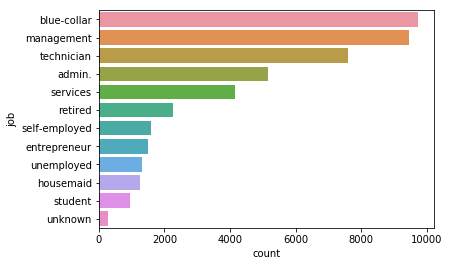

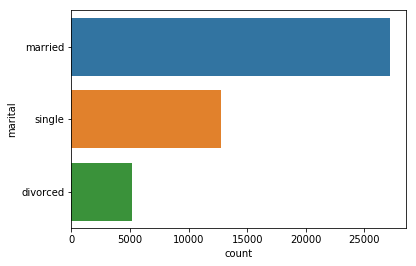

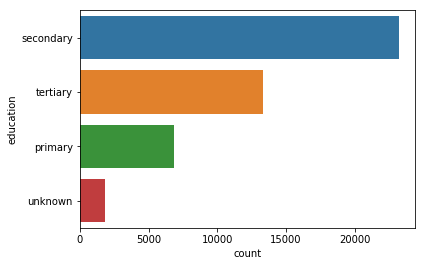

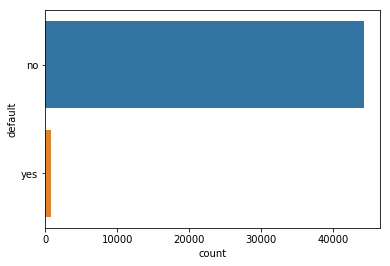

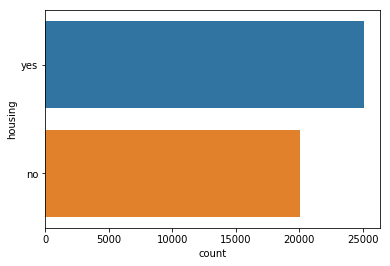

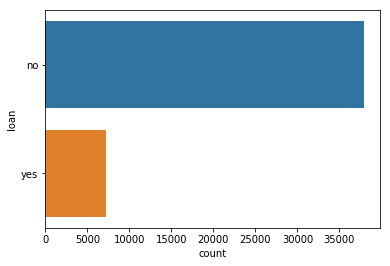

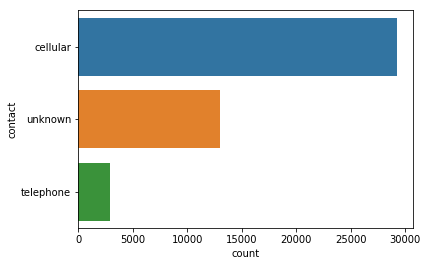

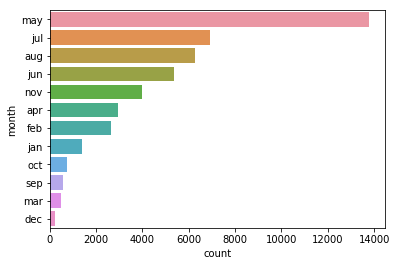

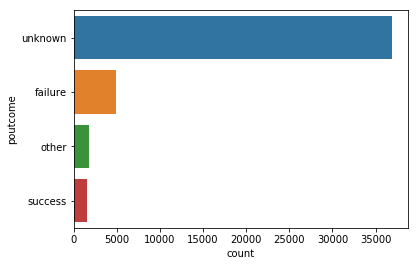

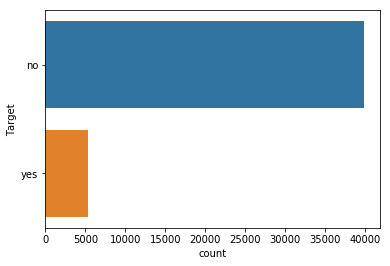

In [23]:
#Plotting CountPlot for each of the categorical column of the dataset.(Scroll to see all the graphs)
for feature in df.dtypes[df.dtypes == 'category'].index:
    sns.countplot(y=feature, data=df, order = df[feature].value_counts().index)
    plt.show()

In [24]:
#removing all the values from the data that says the values are unknown. Imputation would not make sense as replacing them 
# with mode mught not be the correct thing to do
df_cleaned = df.copy()
df_cleaned = df_cleaned[df_cleaned.job != 'unknown']
df_cleaned = df_cleaned[df_cleaned.marital != 'unknown']
df_cleaned = df_cleaned[df_cleaned.education != 'unknown']
del df_cleaned['duration']
df_cleaned = df_cleaned[df_cleaned.housing != 'unknown']
df_cleaned = df_cleaned[df_cleaned.loan != 'unknown']

In [25]:
#for the sake of dimensionality reduction while doing get Dummies on Categorical columns, clubbing similar values
df_cleaned.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)
df_cleaned.job.replace(['admin.', 'management'], 'administration_management', inplace=True)
df_cleaned.job.replace(['blue-collar', 'technician'], 'blue-collar', inplace=True)
df_cleaned.job.replace(['retired', 'unemployed'], 'no_active_income', inplace=True)
df_cleaned.job.replace(['services', 'housemaid'], 'services', inplace=True)
df_cleaned.marital.replace(['single', 'divorced'], 'single', inplace=True)

In [26]:
df_cleaned.job.value_counts()

blue-collar                  16633
administration_management    14216
services                      5199
no_active_income              3419
self-employed                 2951
student                        775
Name: job, dtype: int64

In [27]:
#Getting the positions of the mistakenly labeled 'pdays' as not a non existent customer and pdays cannot come together. 
ind_999 = df_cleaned.loc[(df_cleaned['pdays'] == -1) & (df['poutcome'] != 'unknown')]['pdays'].index.values
#Assigning NaNs instead of '999'
df_cleaned.loc[ind_999, 'pdays'] = np.nan

In [28]:
df_cleaned = df_cleaned.dropna()
#Saving the cleaned dataset as a file
df_cleaned.to_csv('cleaned_data.csv')

In [29]:
df_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,Target
0,58,administration_management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1.0,0,unknown,no
1,44,blue-collar,single,secondary,no,29,yes,no,unknown,5,may,1,-1.0,0,unknown,no
2,33,self-employed,married,secondary,no,2,yes,yes,unknown,5,may,1,-1.0,0,unknown,no
5,35,administration_management,married,tertiary,no,231,yes,no,unknown,5,may,1,-1.0,0,unknown,no
6,28,administration_management,single,tertiary,no,447,yes,yes,unknown,5,may,1,-1.0,0,unknown,no


In [30]:
df_cleaned['Target']=df_cleaned['Target'].map({'no':0,'yes':1})

In [31]:
no=df_cleaned[df_cleaned['Target']==0]
yes=df_cleaned[df_cleaned['Target']==1]

In [32]:
no.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,38172.0,40.669679,10.083233,18.0,33.0,39.0,48.0,95.0
balance,38172.0,1297.333176,2974.636443,-8019.0,57.0,413.0,1339.0,102127.0
day,38172.0,15.900529,8.278280,1.0,8.0,16.0,21.0,31.0
campaign,38172.0,2.838704,3.174498,1.0,1.0,2.0,3.0,58.0
pdays,38172.0,36.709394,97.113903,-1.0,-1.0,-1.0,-1.0,871.0
previous,38172.0,0.507230,2.287439,0.0,0.0,0.0,0.0,275.0
Target,38172.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [33]:
yes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5021.0,41.481777,13.311751,18.0,31.0,38.0,50.0,95.0
balance,5021.0,1785.043019,3483.189469,-3058.0,203.0,718.0,2139.0,81204.0
day,5021.0,15.116710,8.482436,1.0,8.0,15.0,21.0,31.0
campaign,5021.0,2.145987,1.929638,1.0,1.0,2.0,3.0,32.0
pdays,5021.0,68.492731,118.996261,-1.0,-1.0,-1.0,98.0,854.0
previous,5021.0,1.175065,2.576291,0.0,0.0,0.0,2.0,58.0
Target,5021.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Comparing both the classes statistically , 
Age: Mean is almost same (one point difference)
balance : not a large difference
pdays is greater for yes class than no class which is an important point.

In [34]:
yes_numerical=yes.copy(deep=True)
yes_numerical=yes_numerical.drop(categorical_columns,axis=1)
no_numerical=no.copy(deep=True)
no_numerical=no_numerical.drop(categorical_columns,axis=1)

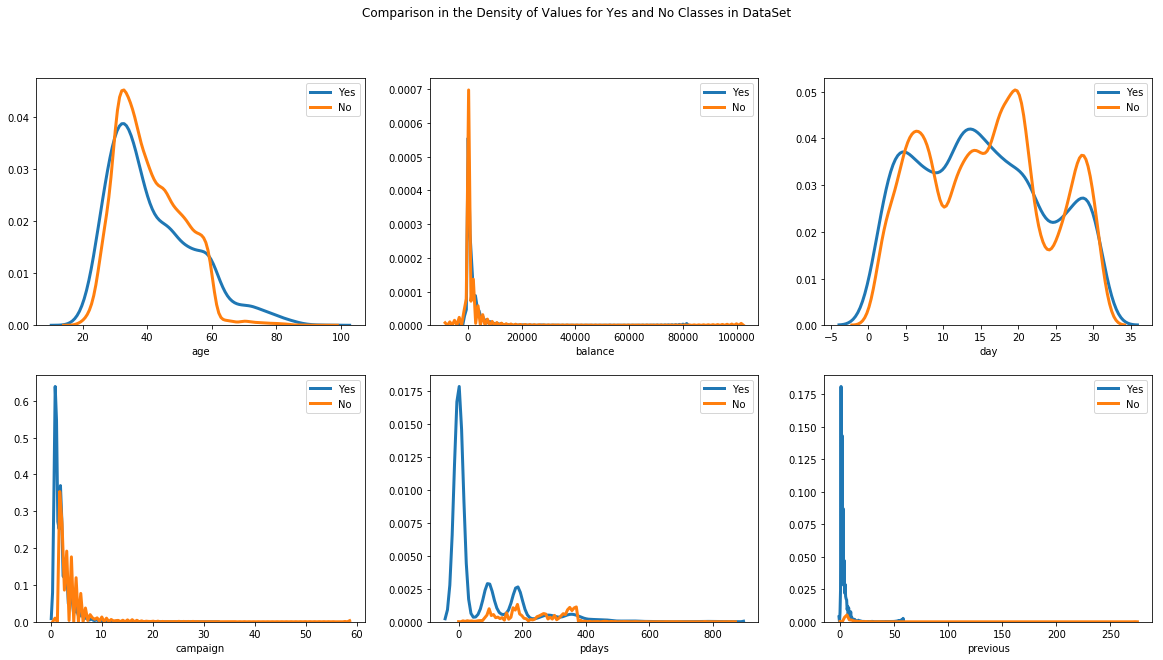

In [35]:
f, axes = plt.subplots(2, 3,figsize=(20,10))
count=0

for i in range(2):
    for j in range(3):
        
        sns.distplot(yes_numerical.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'Yes',ax = axes[i][j])
        sns.distplot(no_numerical.iloc[:,count],kde=True,hist=False,kde_kws = {'linewidth': 3},label = 'No',ax = axes[i][j])
        axes[i][j].legend()
        count=count+1
        
f.suptitle('Comparison in the Density of Values for Yes and No Classes in DataSet')
plt.show()

The graphs show the distribution across the two classes data and their values across 6 numerical atttributes, which shows how imbalanced the dataset is

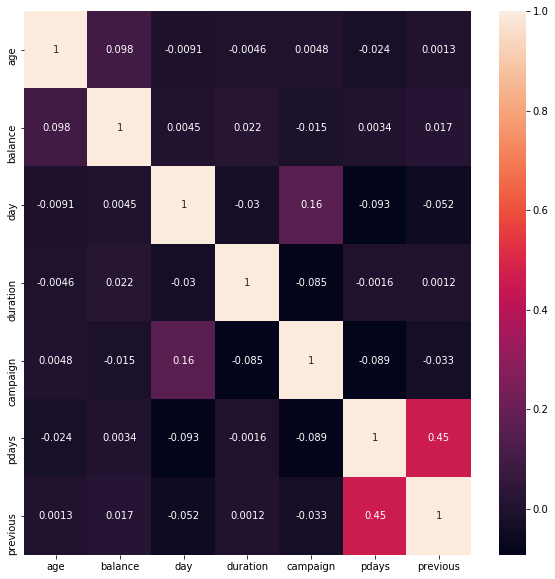

In [36]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), annot = True,ax=ax)

In [69]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


No notable positive or negative corelation between the feature columns

In [37]:
crr_value = df.corr().abs()

s_value = crr_value.unstack()
sorted_values = s_value.sort_values(kind="quicksort")

In [38]:
#correlation columns finding
df.corr().unstack().sort_values(ascending=False)[11:25].drop_duplicates()

balance   age         0.097783
          duration    0.021560
          previous    0.016674
campaign  age         0.004760
balance   day         0.004503
pdays     balance     0.003435
age       previous    0.001288
dtype: float64

There is hardly any corelation between columns of the dataset. 

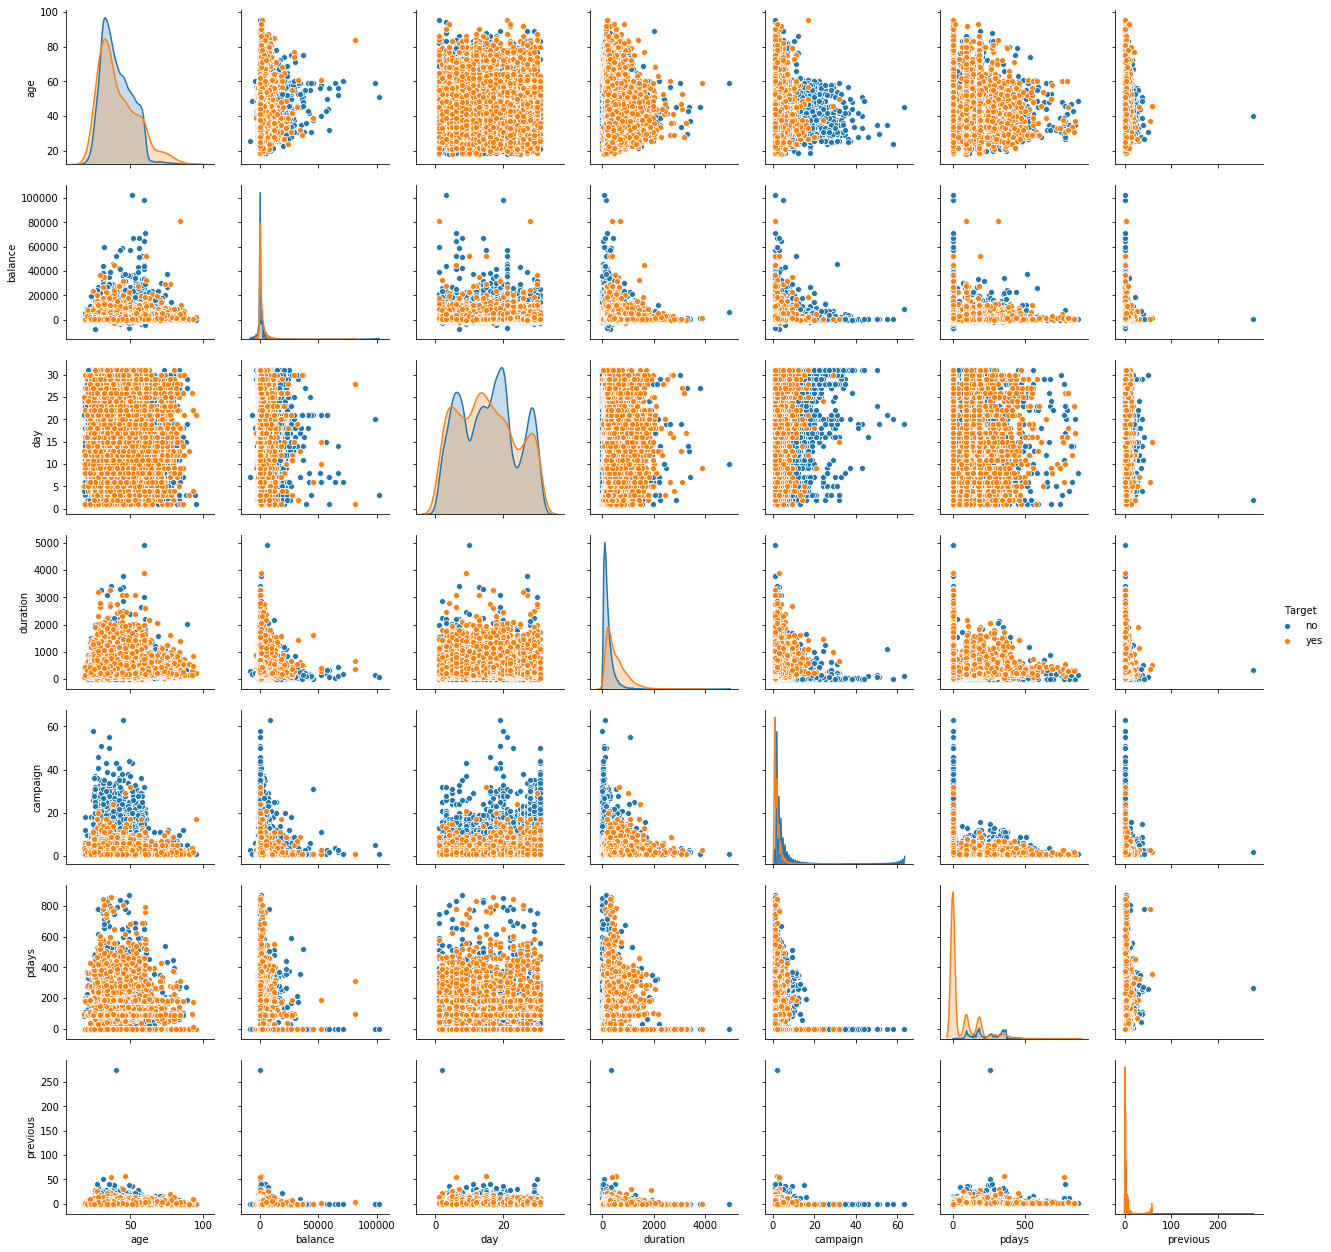

In [39]:
sns.pairplot(data=df,hue='Target')

There is no seemingly linear or non linear pattern seen in the pair panels. this makes the hypothesis strong that columns
are independant of each other which makes it a good study for Naive Bayes' classifier.

In [40]:
df_cleaned1 = pd.get_dummies(df_cleaned, drop_first=True)
df_cleaned1.head()

,age,balance,day,campaign,pdays,previous,Target,job_blue-collar,job_no_active_income,job_self-employed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,1,-1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,1,-1.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,1,-1.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
5,35,231,5,1,-1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6,28,447,5,1,-1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [41]:
X = df_cleaned1.drop('Target', axis=1)
y = df_cleaned1.Target

In [42]:
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

F:\Softwares\Python\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\Softwares\Python\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=0.3, random_state=1)

In [44]:
model=LogisticRegression()
model.fit(X_train,y_train)

F:\Softwares\Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
model.score(X_test,y_test)

0.8946596697021145

In [46]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11456
           1       0.67      0.18      0.29      1502

   micro avg       0.89      0.89      0.89     12958
   macro avg       0.78      0.59      0.62     12958
weighted avg       0.87      0.89      0.87     12958



Eventhough the overall accuracy on test data is impressive, we see that f1-score for predicting class1 is mere 0.36. We need to introduce SMOTE here, before that let us see how other models are performing

In [47]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [48]:
classifier.score(X_test,y_test)

0.8611668467356074

In [49]:
print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11456
           1       0.40      0.39      0.39      1502

   micro avg       0.86      0.86      0.86     12958
   macro avg       0.66      0.66      0.66     12958
weighted avg       0.86      0.86      0.86     12958



As seen without any sampling technique used, we are getting an accuracy of good score. Howeever, the model does not know when it comes with
class of "YES" as the data in the class is quite less. It is evident from the classification report generated. For this, we need to involve SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0)
columns=df_cleaned1.columns
os_data_X,os_data_y=os.fit_sample(X_train,y_train.ravel())
os_data_X=pd.DataFrame(data=os_data_X,columns=df_cleaned1.drop('Target',axis=1).columns)
os_data_y=pd.DataFrame(data=os_data_y,columns=['Target'])

In [51]:
model=LogisticRegression(penalty='l2',C=10,max_iter=1000)
model.fit(os_data_X,os_data_y)

F:\Softwares\Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
model.score(X_test,y_test)

0.7404692082111437

In [53]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84     11456
           1       0.25      0.63      0.36      1502

   micro avg       0.74      0.74      0.74     12958
   macro avg       0.60      0.69      0.60     12958
weighted avg       0.86      0.74      0.78     12958



In [54]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(os_data_X, os_data_y)

F:\Softwares\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [55]:
classifier.score(X_test,y_test)

0.8459638833153265

In [56]:
print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     11456
           1       0.36      0.44      0.40      1502

   micro avg       0.85      0.85      0.85     12958
   macro avg       0.64      0.67      0.65     12958
weighted avg       0.86      0.85      0.85     12958



In [44]:
from sklearn import svm
clfsvm = svm.SVC(gamma='scale',decision_f64unction_shape='ovo')

In [46]:
clfsvm.fit(os_data_X,os_data_y)

In [158]:
clfsvm.score(X_test,y_test)

0.8255131964809385

In [159]:
print(classification_report(y_test,clfsvm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     11456
           1       0.34      0.55      0.42      1502

   micro avg       0.83      0.83      0.83     12958
   macro avg       0.64      0.71      0.66     12958
weighted avg       0.87      0.83      0.84     12958



SVM is expensive for such a large dataset.

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
clf = DecisionTreeClassifier(random_state=0,max_depth=15,max_leaf_nodes=15)
clf.fit(os_data_X, os_data_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [91]:
clf.score(X_test,y_test)

0.8381694705973144

In [79]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.58      0.71     11456
           1       0.17      0.64      0.26      1502

   micro avg       0.59      0.59      0.59     12958
   macro avg       0.55      0.61      0.49     12958
weighted avg       0.84      0.59      0.66     12958



In [95]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
clfr = RandomForestClassifier(n_estimators=100, max_depth=10,random_state=0,max_leaf_nodes=15)
clfr.fit(os_data_X, os_data_y)

F:\Softwares\Python\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=15,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [101]:
clfr.score(X_test,y_test)

0.8033647167772805

In [54]:
print(classification_report(y_test,clfr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     11456
           1       0.27      0.61      0.37      1502

   micro avg       0.76      0.76      0.76     12958
   macro avg       0.60      0.70      0.61     12958
weighted avg       0.86      0.76      0.80     12958



In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
clfa = AdaBoostClassifier(n_estimators=1000, random_state=0,learning_rate=0.4)
clfa.fit(os_data_X, os_data_y)

F:\Softwares\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.4, n_estimators=1000, random_state=0)

In [72]:
clfa.score(X_test,y_test)

0.8807686371353604

In [53]:
print(classification_report(y_test,clfa.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7633
           1       0.51      0.38      0.44      1006

   micro avg       0.89      0.89      0.89      8639
   macro avg       0.71      0.67      0.69      8639
weighted avg       0.87      0.89      0.88      8639



After SMOTE,we saw that there is a drastic reduction in the accuracy score of the model. However, using Naive Bayes' seemed to be a good option as we did not have any requirement of building complex models.

Ensembling on the other hand has boosted the performance , especially Adapative Booster which has increased the accuracy to 88% which is pretty impressive. However, the representation of class 'yes' is very less and all the models after SMOTE is giving a f-1 score of 0.40 as an average.

Initially, adaptive booster was not giving good output, after which the hyper parameters were tuned like the raining rate and 
number of estimators that it should construct. The tuning helped in achieving better results where class 0 is identified with
94 % accuracy

In [174]:
pred=clfa.predict(X_test)

In [170]:
from pandas_ml import ConfusionMatrix
cm = ConfusionMatrix(y_test, pred)

In [171]:
cm

Predicted  False  True  __all__
Actual                         
False       3267   341     3608
True         128     3      131
__all__     3395   344     3739

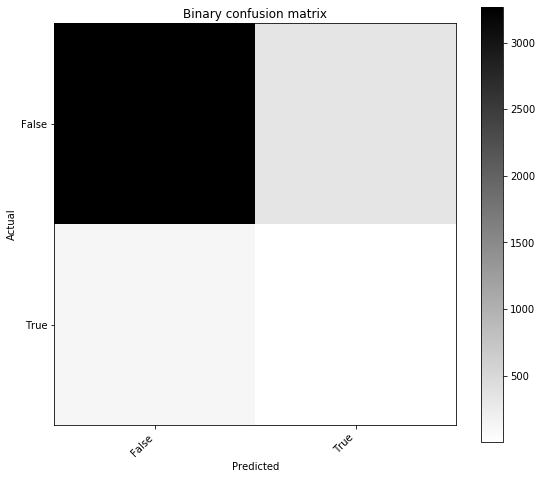

In [172]:
cm.plot()

In [173]:
cm.print_stats()


population: 3739
P: 131
N: 3608
PositiveTest: 344
NegativeTest: 3395
TP: 3
TN: 3267
FP: 341
FN: 128
TPR: 0.022900763358778626
TNR: 0.9054878048780488
PPV: 0.00872093023255814
NPV: 0.9622974963181149
FPR: 0.09451219512195122
FDR: 0.9912790697674418
FNR: 0.9770992366412213
ACC: 0.8745653918159936
F1_score: 0.01263157894736842
MCC: -0.045556689623543256
informedness: -0.07161143176317253
markedness: -0.028981573449326947
prevalence: 0.0350361059106713
LRP: 0.2423048510219158
LRN: 1.0790860256509112
DOR: 0.22454637096774194
FOR: 0.03770250368188512


The Confusion Matrix statistics show that the model is not good for identifying class with value 1 as the data is not represented 
in terms of count.

In [64]:
from sklearn.ensemble import VotingClassifier
emodel = VotingClassifier(estimators=[('lr', model), ('nb', classifier)], voting='hard')
emodel.fit(os_data_X, os_data_y)
emodel.score(X_test,y_test)

F:\Softwares\Python\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Softwares\Python\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\Softwares\Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8638678808458096

In [67]:
print(classification_report(y_test,emodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     11456
           1       0.41      0.41      0.41      1502

   micro avg       0.86      0.86      0.86     12958
   macro avg       0.67      0.67      0.67     12958
weighted avg       0.86      0.86      0.86     12958



Evidently,individual performance of Logistic Regression and Naive Bayes' was less than the performance we got by ensemble technique when we combined both and built a model. Still, we do not have an answer for the improvization of f-1 score for class 1 due to underrepresentation

In [94]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bgmodel = BaggingClassifier(tree.DecisionTreeClassifier(random_state=0,max_depth=15,max_leaf_nodes=15))
bgmodel.fit(os_data_X, os_data_y)
model.score(X_test,y_test)

F:\Softwares\Python\lib\site-packages\sklearn\ensemble\bagging.py:622: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7404692082111437

Bagging classifier for decision tree is worse than independant tree classifier

In [102]:
print(classification_report(y_test,bgmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     11456
           1       0.32      0.52      0.39      1502

   micro avg       0.81      0.81      0.81     12958
   macro avg       0.62      0.69      0.64     12958
weighted avg       0.86      0.81      0.83     12958



In [110]:
from sklearn.ensemble import GradientBoostingClassifier
gbmodel= GradientBoostingClassifier(learning_rate=0.04,random_state=1,n_estimators=1000,max_depth=15,max_leaf_nodes=15)
gbmodel.fit(os_data_X, os_data_y)


F:\Softwares\Python\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.04, loss='deviance', max_depth=15,
              max_features=None, max_leaf_nodes=15,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [111]:
gbmodel.score(X_test,y_test)

0.8930390492359932

In [112]:
print(classification_report(y_test,gbmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11456
           1       0.57      0.30      0.39      1502

   micro avg       0.89      0.89      0.89     12958
   macro avg       0.74      0.64      0.67     12958
weighted avg       0.87      0.89      0.88     12958



Gradientboosting Classifier is the highest performing classifier as per the models we have built. It is able to perform 89.3%
accuracy which is good for an imbalanced dataset such as the one we are using.

From the models we have built, we see that Boosting gives the maximum accuracy compared to other ensemble techniques which is quite expected. Tuning the hyper parameters does the trick for decision tree and random forest classifier - like max_depth and max_leaf_nodes. In AdaBoostClassifier, we need to tune the number of estimators and the learning rate at which the model should learn from the errors committed for getting a good accuracy.

Overall, ensemble techniques provide the best of multiple various algorithms and it helps in building models with multiple algo implementation at the same time. VotingClassifier is the best example for plugging multiple algos and building a suitable model for the dataset.